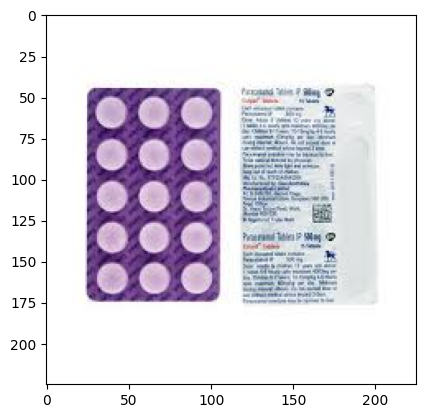

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
img=image.load_img("basedata/training/non-counterfiet/images01.jpg")
plt.imshow(img)

In [2]:
cv2.imread("basedata/training/non-counterfiet/images01.jpg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [3]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset=train.flow_from_directory("basedata/training/",target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory("basedata/validation/",target_size=(200,200),batch_size=3,class_mode='binary')

Found 21 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'counterfiet': 0, 'non-counterfiet': 1}

In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  #
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
    
])

In [8]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"]
             )

In [9]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=10,
                   validation_data=validation_dataset
                   )

Epoch 1/10
3/3 [==============================] - 6s 1s/step - loss: 7.8066 - accuracy: 0.4444 - val_loss: 0.6996 - val_accuracy: 0.6111
Epoch 2/10
3/3 [==============================] - 2s 745ms/step - loss: 0.6831 - accuracy: 0.5556 - val_loss: 0.6259 - val_accuracy: 0.6111
Epoch 3/10
3/3 [==============================] - 2s 786ms/step - loss: 0.9907 - accuracy: 0.6667 - val_loss: 0.5931 - val_accuracy: 0.6111
Epoch 4/10
3/3 [==============================] - 2s 789ms/step - loss: 0.5497 - accuracy: 0.6667 - val_loss: 0.5285 - val_accuracy: 0.9444
Epoch 5/10
3/3 [==============================] - 2s 765ms/step - loss: 0.7442 - accuracy: 0.7778 - val_loss: 0.5829 - val_accuracy: 0.6111
Epoch 6/10
3/3 [==============================] - 2s 719ms/step - loss: 0.5499 - accuracy: 0.5556 - val_loss: 0.4517 - val_accuracy: 0.8333
Epoch 7/10
3/3 [==============================] - 2s 777ms/step - loss: 0.4505 - accuracy: 0.7778 - val_loss: 0.3709 - val_accuracy: 1.0000
Epoch 8/10
3/3 [=======

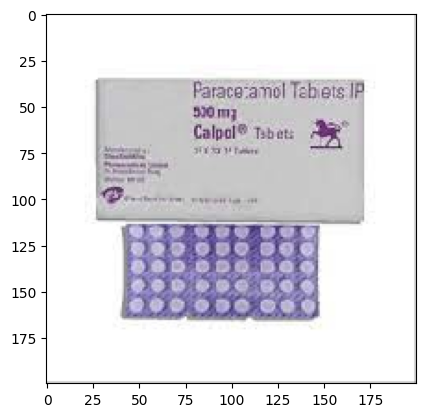

1/1 [==============================] - 0s 51ms/step
not counterfieet


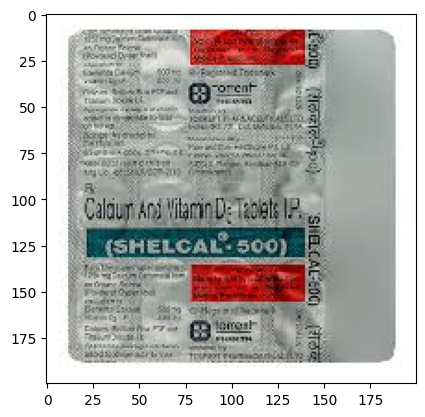

1/1 [==============================] - 0s 49ms/step
not counterfieet


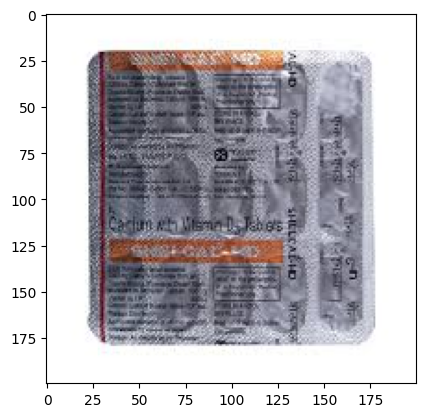

1/1 [==============================] - 0s 88ms/step
not counterfieet


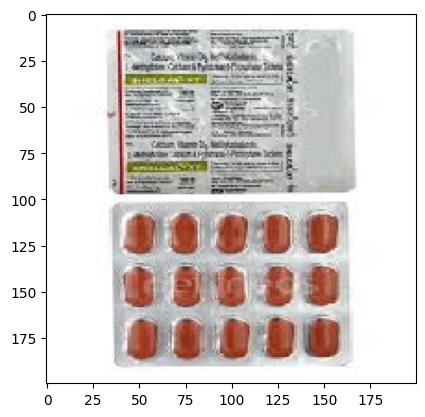

1/1 [==============================] - 0s 107ms/step
not counterfieet


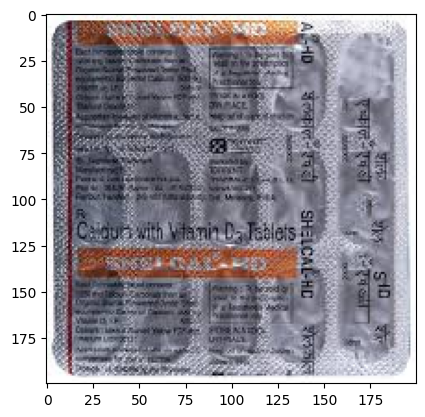

1/1 [==============================] - 0s 74ms/step
not counterfieet


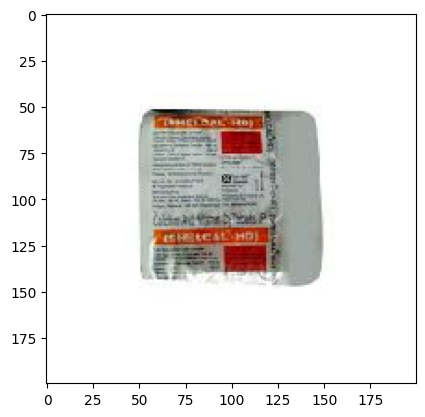

1/1 [==============================] - 0s 70ms/step
not counterfieet


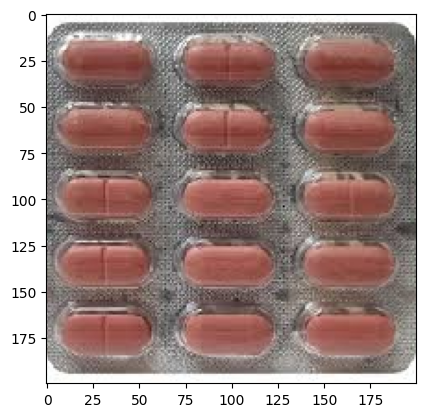

1/1 [==============================] - 0s 66ms/step
not counterfieet


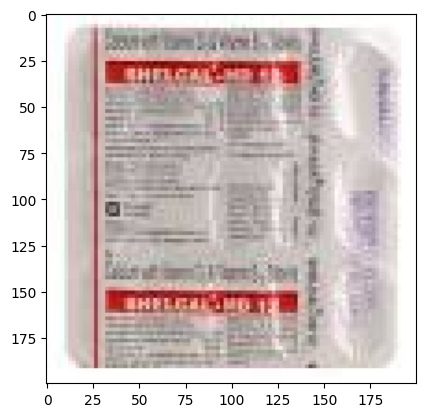

1/1 [==============================] - 0s 81ms/step
not counterfieet


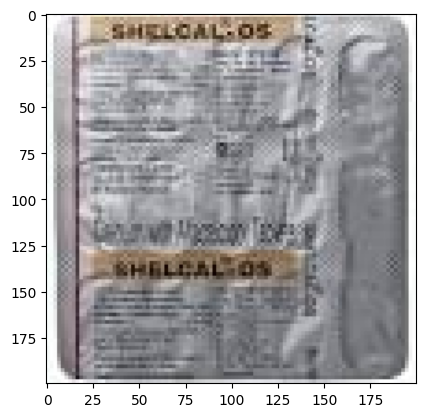

1/1 [==============================] - 0s 56ms/step
not counterfieet


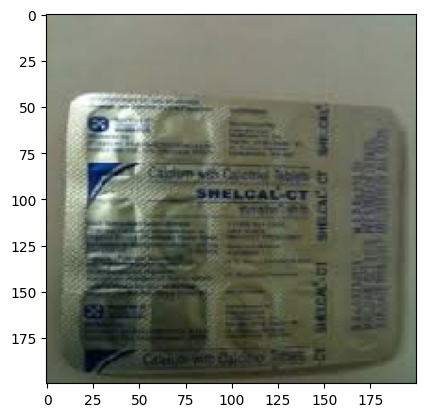

1/1 [==============================] - 0s 61ms/step
not counterfieet


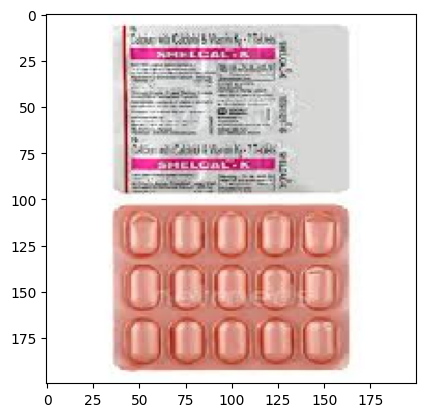

1/1 [==============================] - 0s 65ms/step
not counterfieet


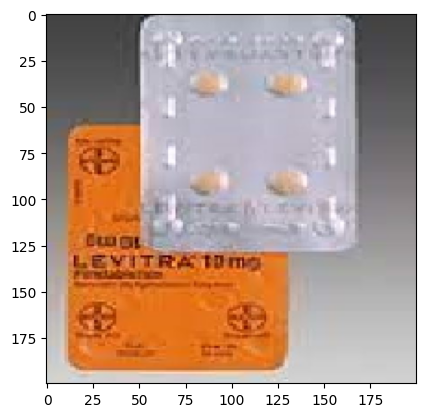

1/1 [==============================] - 0s 40ms/step
 counterfiet


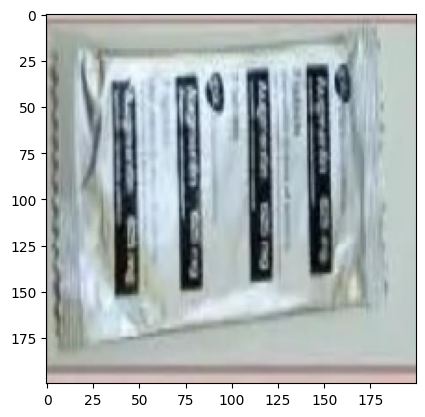

1/1 [==============================] - 0s 104ms/step
 counterfiet


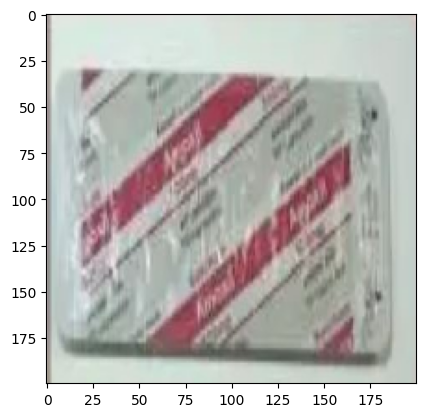

1/1 [==============================] - 0s 97ms/step
not counterfieet


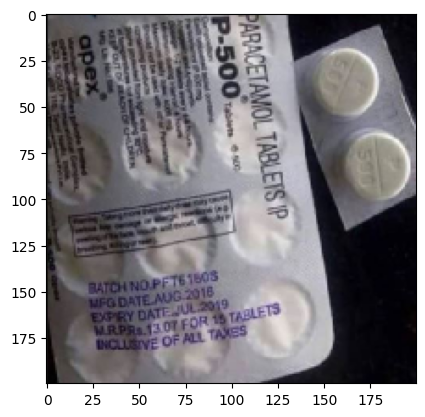

1/1 [==============================] - 0s 158ms/step
not counterfieet


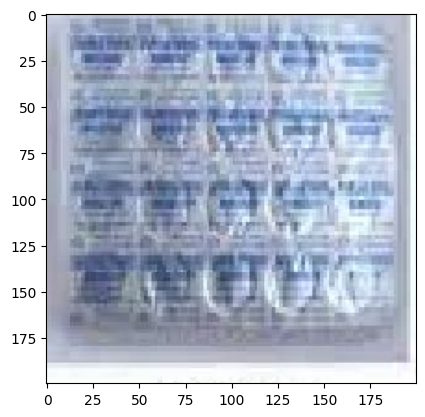

1/1 [==============================] - 0s 49ms/step
not counterfieet


In [11]:
dir_path="basedata/testing/"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'/'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print(" counterfiet")
    else:
        print("not counterfieet")